# Contexte Problématique 
Le but de ce projet est d'étudier l'influence des publications Reddit sur la tendace des prix des crypto-monnaies. Pour ce faire, nous avons eu recours à une base de données composée de 5 tables (close, high, low, open, volume, reddit)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import norm


# Loading Data

In [2]:
close_df=pd.read_csv("/kaggle/input/crypto/close.csv")
high_df=pd.read_csv("/kaggle/input/crypto/high.csv")
low_df=pd.read_csv("/kaggle/input/crypto/low.csv")
open_df=pd.read_csv("/kaggle/input/crypto/open.csv")
volume_df=pd.read_csv("/kaggle/input/crypto/volume.csv")




# Data exploration

In [3]:
open_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Columns: 128 entries, Unnamed: 0 to ZRXUSDT
dtypes: float64(127), object(1)
memory usage: 10.7+ MB


In [4]:
open_df.describe()

,1000SHIBUSDT,1000XECUSDT,1INCHUSDT,AAVEUSDT,ADAUSDT,ALGOUSDT,ALICEUSDT,ALPHAUSDT,ANKRUSDT,ANTUSDT,...,XEMUSDT,XLMUSDT,XMRUSDT,XRPUSDT,XTZUSDT,YFIUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
count,10992.000000,8396.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,5971.000000,...,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000,10992.000000
mean,0.019872,0.098871,2.102563,209.620022,1.263301,0.997991,8.400483,0.551161,0.075847,4.006560,...,0.118135,0.236829,208.330772,0.741749,3.595072,23993.123735,124.448204,52.384709,0.073593,0.714977
std,0.013732,0.059343,1.109594,101.648447,0.652843,0.542270,5.160177,0.355698,0.030511,2.675575,...,0.052556,0.089883,49.870137,0.276730,1.654891,11079.156475,41.894544,27.798080,0.029981,0.286056
min,0.004948,0.028040,0.521700,46.130000,0.406900,0.280000,1.844000,0.095400,0.023300,1.180000,...,0.035700,0.099220,99.390000,0.294300,1.210000,4103.000000,50.670000,12.462000,0.029890,0.225400
25%,0.008392,0.046810,1.074500,115.060000,0.655400,0.583050,3.555500,0.221000,0.050257,1.745000,...,0.062575,0.149960,167.090000,0.514900,2.173000,13986.500000,94.787500,25.884500,0.045640,0.471350
50%,0.013131,0.081835,2.007850,190.245000,1.193050,0.886850,6.969000,0.458700,0.077080,3.587000,...,0.116200,0.236735,207.185000,0.761500,3.251000,24857.000000,123.785000,50.507500,0.070675,0.722650
75%,0.027224,0.117855,2.919750,299.410000,1.656225,1.438525,12.583750,0.861725,0.096850,5.283500,...,0.166200,0.316293,250.990000,0.942975,4.488250,33347.500000,152.792500,74.794750,0.098863,0.951400
max,0.086259,0.269880,6.712600,445.740000,3.099400,2.440600,28.494000,1.495100,0.206090,13.866000,...,0.243600,0.433840,339.000000,1.413700,8.987000,47365.700000,302.500000,133.926000,0.218280,1.513800


In [5]:
open_df.head()

,Unnamed: 0,1000SHIBUSDT,1000XECUSDT,1INCHUSDT,AAVEUSDT,ADAUSDT,ALGOUSDT,ALICEUSDT,ALPHAUSDT,ANKRUSDT,...,XEMUSDT,XLMUSDT,XMRUSDT,XRPUSDT,XTZUSDT,YFIUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
0,2021-06-01 00:00:00,0.009403,NaN,3.1777,376.52,1.7002,0.9164,7.226,0.8469,0.10439,...,0.1889,0.39402,272.01,1.0111,3.542,46455.4,158.15,107.525,0.11350,1.0054
1,2021-06-01 01:00:00,0.009278,NaN,3.2128,383.13,1.7402,0.9369,7.431,0.8676,0.10638,...,0.1951,0.40272,272.91,1.0459,3.606,46973.5,162.25,107.785,0.11551,1.0210
2,2021-06-01 02:00:00,0.009193,NaN,3.2544,385.81,1.7719,0.9399,7.599,0.8827,0.10847,...,0.1963,0.41357,273.26,1.0905,3.605,47365.7,163.18,111.316,0.11729,1.0258
3,2021-06-01 03:00:00,0.009095,NaN,3.1696,377.43,1.7275,0.9185,7.310,0.8548,0.10668,...,0.1922,0.40129,267.61,1.0601,3.541,46123.1,158.51,108.772,0.11468,0.9961
4,2021-06-01 04:00:00,0.009043,NaN,3.1456,382.25,1.7113,0.9164,7.218,0.8509,0.10767,...,0.1916,0.40234,270.87,1.0445,3.541,45830.4,157.07,107.613,0.11396,1.0019


In [6]:
open_df.tail()

,Unnamed: 0,1000SHIBUSDT,1000XECUSDT,1INCHUSDT,AAVEUSDT,ADAUSDT,ALGOUSDT,ALICEUSDT,ALPHAUSDT,ANKRUSDT,...,XEMUSDT,XLMUSDT,XMRUSDT,XRPUSDT,XTZUSDT,YFIUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
10987,2022-09-01 19:00:00,0.011997,0.04522,0.6502,84.09,0.4498,0.2882,1.986,0.1195,0.03401,...,0.0427,0.10290,151.55,0.3245,1.498,8993.0,57.67,15.506,0.03549,0.2909
10988,2022-09-01 20:00:00,0.012051,0.04531,0.6533,84.47,0.4524,0.2880,1.993,0.1199,0.03409,...,0.0429,0.10322,151.48,0.3270,1.500,8994.0,57.87,15.519,0.03560,0.2917
10989,2022-09-01 21:00:00,0.012082,0.04571,0.6566,85.29,0.4528,0.2895,2.009,0.1204,0.03439,...,0.0429,0.10385,151.68,0.3295,1.507,9032.0,58.20,15.606,0.03566,0.2927
10990,2022-09-01 22:00:00,0.012233,0.04596,0.6631,86.00,0.4561,0.2918,2.030,0.1216,0.03475,...,0.0435,0.10427,152.87,0.3320,1.522,9173.0,59.13,15.701,0.03596,0.2953
10991,2022-09-01 23:00:00,0.012271,0.04605,0.6651,86.52,0.4567,0.2916,2.035,0.1220,0.03483,...,0.0437,0.10453,153.94,0.3318,1.529,9274.0,59.28,15.712,0.03616,0.2954


In [7]:
# list of the columns'names
print(open_df.columns.tolist())

['Unnamed: 0', '1000SHIBUSDT', '1000XECUSDT', '1INCHUSDT', 'AAVEUSDT', 'ADAUSDT', 'ALGOUSDT', 'ALICEUSDT', 'ALPHAUSDT', 'ANKRUSDT', 'ANTUSDT', 'ARPAUSDT', 'ARUSDT', 'ATAUSDT', 'ATOMUSDT', 'AUDIOUSDT', 'AVAXUSDT', 'AXSUSDT', 'BAKEUSDT', 'BALUSDT', 'BANDUSDT', 'BATUSDT', 'BCHUSDT', 'BELUSDT', 'BLZUSDT', 'BNBUSDT', 'BTCDOMUSDT', 'BTCUSDT', 'C98USDT', 'CELOUSDT', 'CELRUSDT', 'CHRUSDT', 'CHZUSDT', 'COMPUSDT', 'COTIUSDT', 'CRVUSDT', 'CTKUSDT', 'CTSIUSDT', 'CVCUSDT', 'DASHUSDT', 'DEFIUSDT', 'DENTUSDT', 'DGBUSDT', 'DOGEUSDT', 'DOTUSDT', 'DUSKUSDT', 'DYDXUSDT', 'EGLDUSDT', 'ENJUSDT', 'ENSUSDT', 'EOSUSDT', 'ETCUSDT', 'ETHUSDT', 'FILUSDT', 'FLMUSDT', 'FTMUSDT', 'GALAUSDT', 'GRTUSDT', 'GTCUSDT', 'HBARUSDT', 'HNTUSDT', 'HOTUSDT', 'ICPUSDT', 'ICXUSDT', 'IOSTUSDT', 'IOTAUSDT', 'IOTXUSDT', 'KAVAUSDT', 'KLAYUSDT', 'KNCUSDT', 'KSMUSDT', 'LINAUSDT', 'LINKUSDT', 'LITUSDT', 'LPTUSDT', 'LRCUSDT', 'LTCUSDT', 'MANAUSDT', 'MASKUSDT', 'MATICUSDT', 'MKRUSDT', 'MTLUSDT', 'NEARUSDT', 'NEOUSDT', 'NKNUSDT', 'OCEANUS

In [3]:
# renaming the first column in each data frame 'date'

for df in [close_df, high_df, low_df, open_df, volume_df]:
    df.rename(columns={'Unnamed: 0':'date'}, inplace=True)

In [9]:
# checking the missing values 

missing_values = high_df.isna().sum()
for column, count in missing_values .items():
        print(f"{column}: {count}")

date: 0
1000SHIBUSDT: 0
1000XECUSDT: 2596
1INCHUSDT: 0
AAVEUSDT: 0
ADAUSDT: 0
ALGOUSDT: 0
ALICEUSDT: 0
ALPHAUSDT: 0
ANKRUSDT: 0
ANTUSDT: 5021
ARPAUSDT: 3364
ARUSDT: 2860
ATAUSDT: 2188
ATOMUSDT: 0
AUDIOUSDT: 1900
AVAXUSDT: 0
AXSUSDT: 0
BAKEUSDT: 0
BALUSDT: 0
BANDUSDT: 0
BATUSDT: 0
BCHUSDT: 0
BELUSDT: 0
BLZUSDT: 0
BNBUSDT: 0
BTCDOMUSDT: 484
BTCUSDT: 0
C98USDT: 2020
CELOUSDT: 2836
CELRUSDT: 0
CHRUSDT: 0
CHZUSDT: 0
COMPUSDT: 0
COTIUSDT: 0
CRVUSDT: 0
CTKUSDT: 0
CTSIUSDT: 3532
CVCUSDT: 0
DASHUSDT: 0
DEFIUSDT: 0
DENTUSDT: 0
DGBUSDT: 0
DOGEUSDT: 0
DOTUSDT: 0
DUSKUSDT: 5284
DYDXUSDT: 2428
EGLDUSDT: 0
ENJUSDT: 0
ENSUSDT: 4372
EOSUSDT: 0
ETCUSDT: 0
ETHUSDT: 0
FILUSDT: 0
FLMUSDT: 0
FTMUSDT: 0
GALAUSDT: 2620
GRTUSDT: 0
GTCUSDT: 244
HBARUSDT: 0
HNTUSDT: 0
HOTUSDT: 0
ICPUSDT: 10992
ICXUSDT: 0
IOSTUSDT: 0
IOTAUSDT: 0
IOTXUSDT: 1732
KAVAUSDT: 0
KLAYUSDT: 3196
KNCUSDT: 0
KSMUSDT: 0
LINAUSDT: 0
LINKUSDT: 0
LITUSDT: 0
LPTUSDT: 3916
LRCUSDT: 0
LTCUSDT: 0
MANAUSDT: 0
MASKUSDT: 2092
MATICUSDT: 0
MKRUSDT: 0
M

In [10]:
# the columns with missing values

missing_values = high_df.isna().sum()
for column, count in missing_values .items():
    if count>0:
        print(f"{column}: {count}")

1000XECUSDT: 2596
ANTUSDT: 5021
ARPAUSDT: 3364
ARUSDT: 2860
ATAUSDT: 2188
AUDIOUSDT: 1900
BTCDOMUSDT: 484
C98USDT: 2020
CELOUSDT: 2836
CTSIUSDT: 3532
DUSKUSDT: 5284
DYDXUSDT: 2428
ENSUSDT: 4372
GALAUSDT: 2620
GTCUSDT: 244
ICPUSDT: 10992
IOTXUSDT: 1732
KLAYUSDT: 3196
LPTUSDT: 3916
MASKUSDT: 2092
PEOPLEUSDT: 4949
RAYUSDT: 1924
ROSEUSDT: 5116


In [11]:
nombre = (high_df.isnull().sum() > 0).sum()
print(nombre)

23


On a 23 colonnes ayant des valeurs manquantes.

**Lineplots of some coins with missing values**

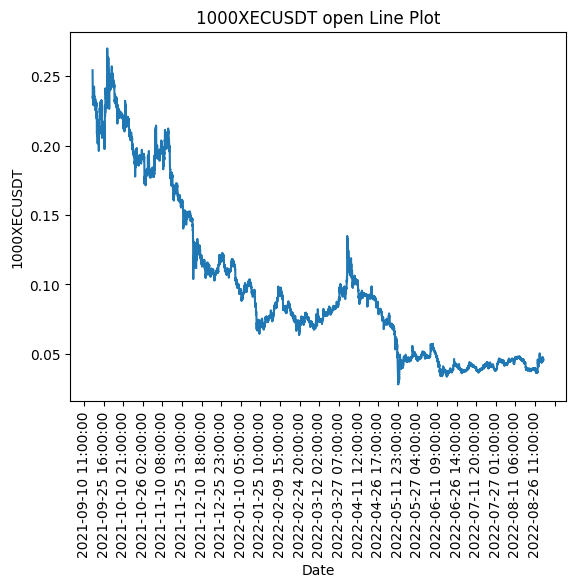

In [12]:
# 1000XECUSDT open Line Plot
plt.plot(open_df['date'], open_df['1000XECUSDT'])
plt.xlabel('Date')
plt.ylabel('1000XECUSDT')
plt.title('1000XECUSDT open Line Plot')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=12))
plt.xticks(rotation=90)
plt.show()

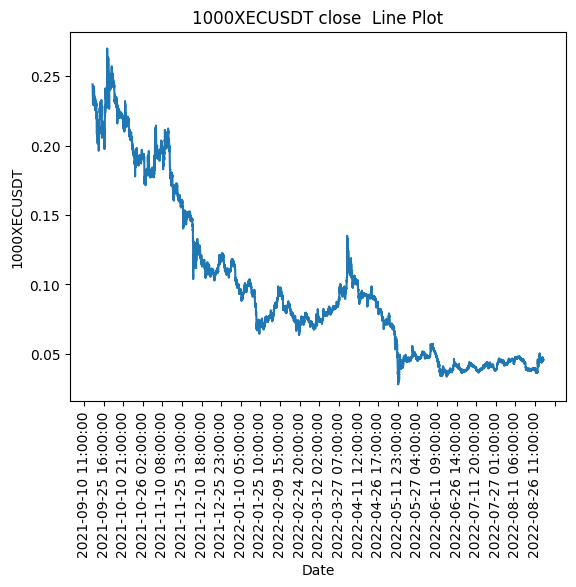

In [13]:
#1000XECUSDT close  Line Plot
plt.plot(close_df['date'], close_df['1000XECUSDT'])
plt.xlabel('Date')
plt.ylabel('1000XECUSDT')
plt.title('1000XECUSDT close  Line Plot')
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator(interval=12))
plt.xticks(rotation=90)
plt.show()

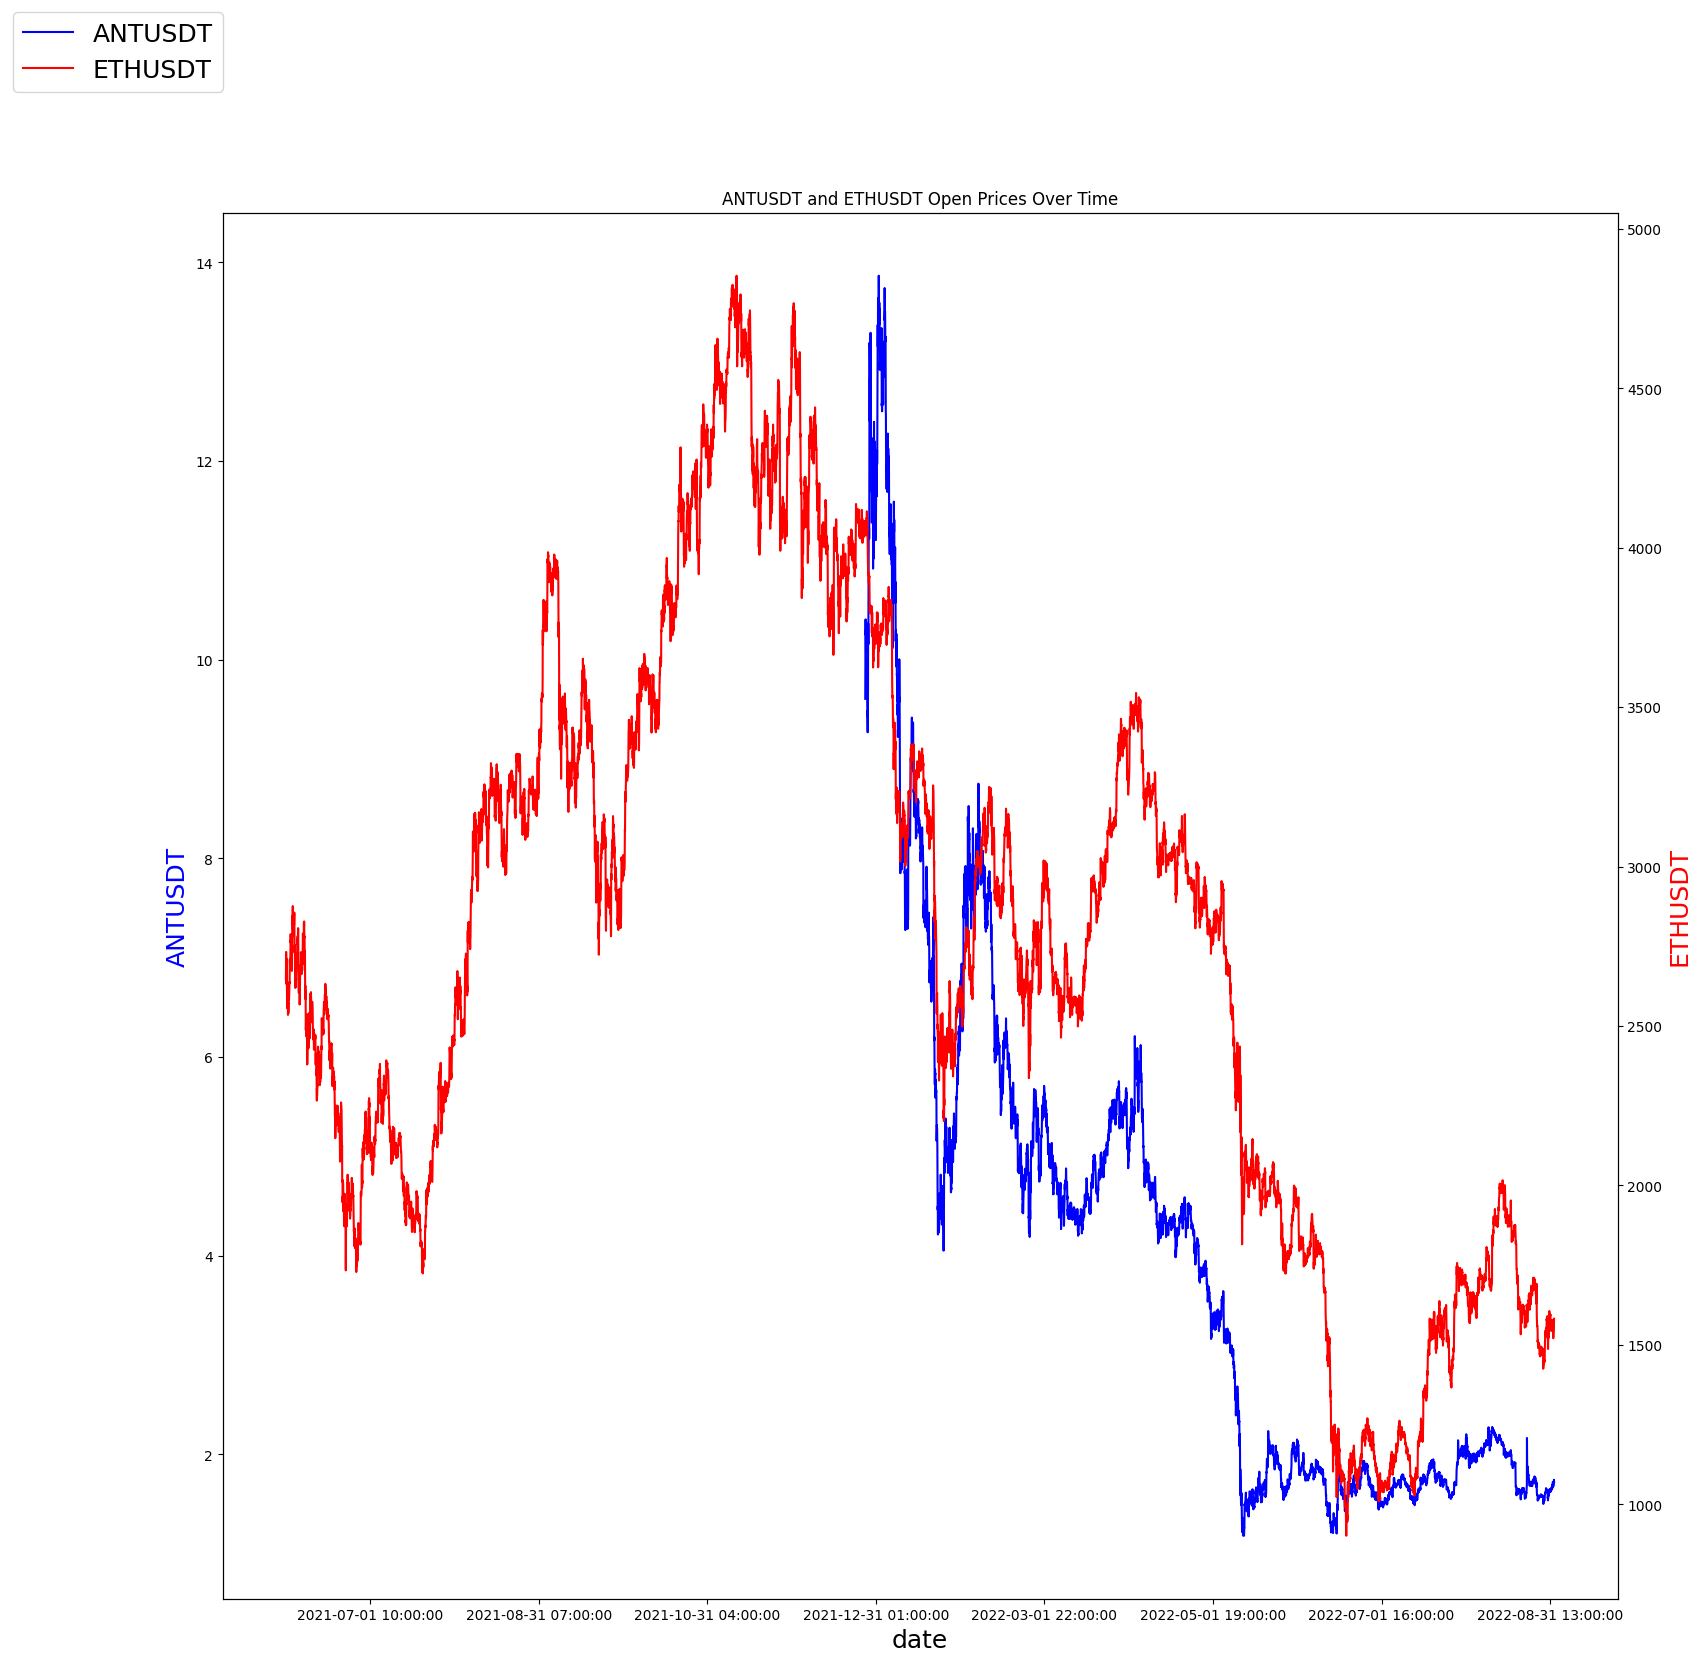

In [14]:
# Comparison between the lineplots of ANTUSDT(with missing values) and ZENUSDT(without missing values)

fig, ax1 = plt.subplots(figsize=(18, 18))
ax1.plot(open_df['date'], open_df['ANTUSDT'], color='b', label='ANTUSDT')
ax1.set_xlabel('date', fontsize=18)
ax1.set_ylabel('ANTUSDT', color='b', fontsize=18)
ax2 = ax1.twinx()
ax2.plot(open_df['date'], open_df['ETHUSDT'], color='r', label='ETHUSDT')
ax2.set_ylabel('ETHUSDT', color='r', fontsize=18)
fig.legend(loc='upper left', fontsize=18)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.title('ANTUSDT and ETHUSDT Open Prices Over Time')
plt.show()

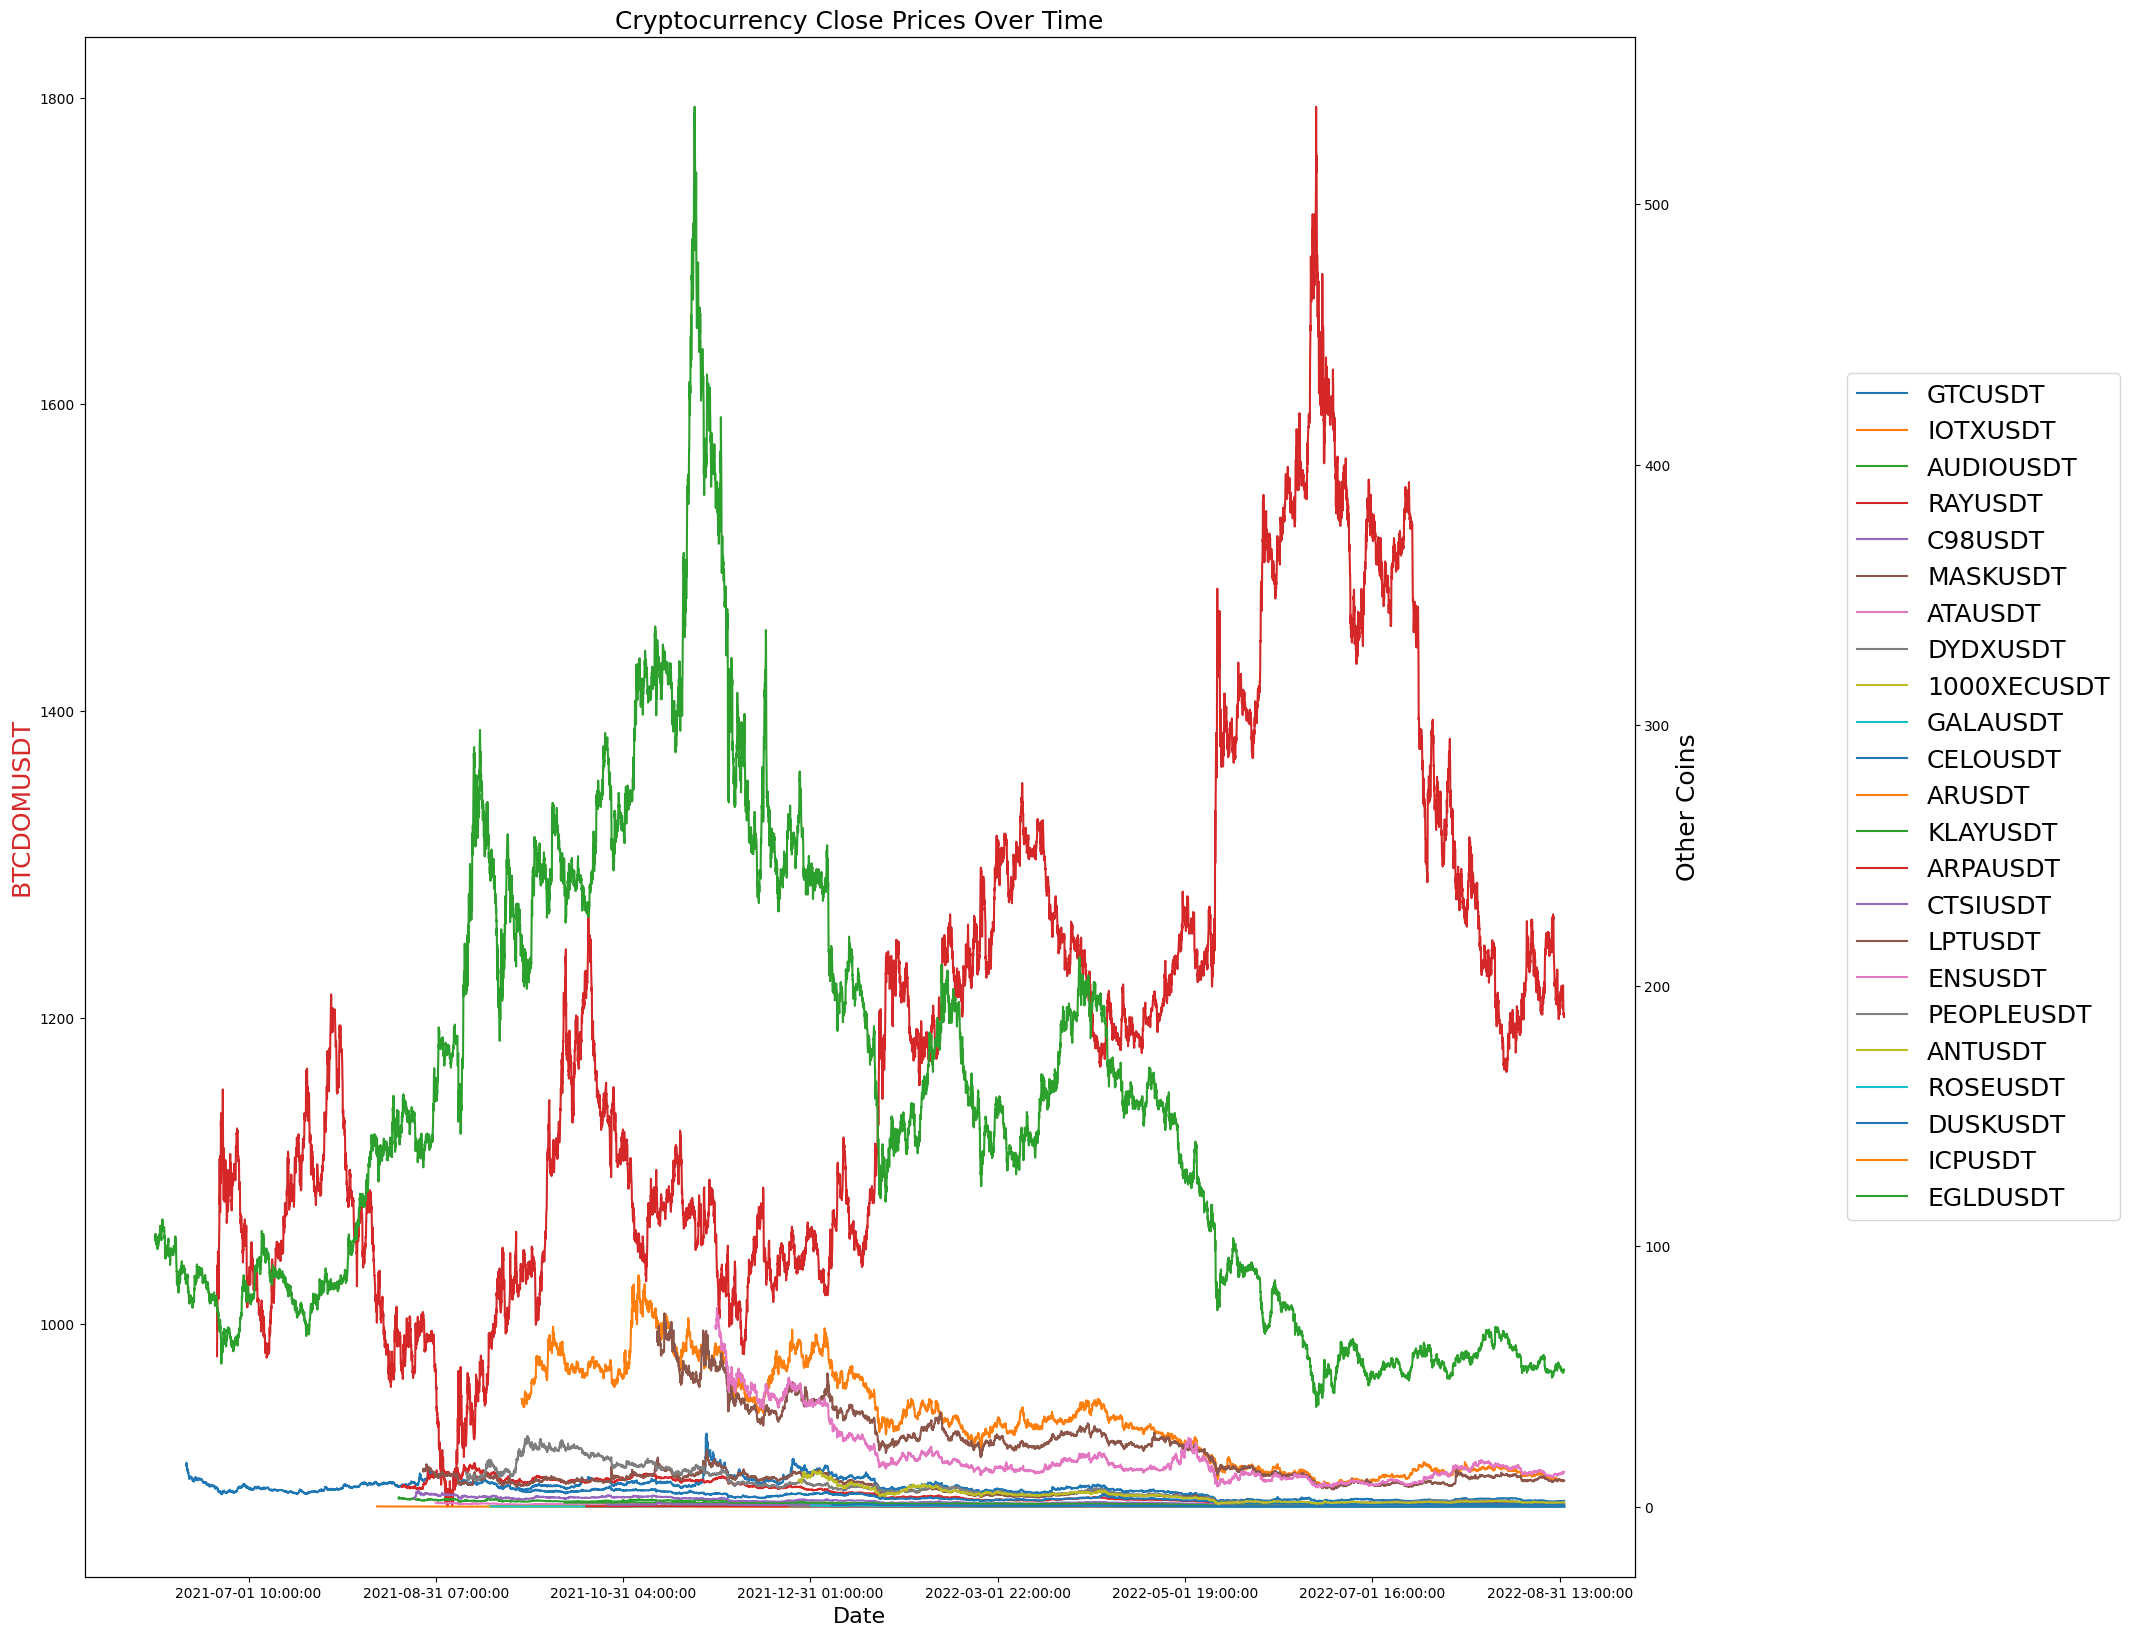

In [15]:
# Close lineplots of the coins with missing values

selected_coins = ['GTCUSDT', 'BTCDOMUSDT', 'IOTXUSDT', 'AUDIOUSDT', 'RAYUSDT',
                   'C98USDT', 'MASKUSDT', 'ATAUSDT', 'DYDXUSDT', '1000XECUSDT',
                   'GALAUSDT', 'CELOUSDT', 'ARUSDT', 'KLAYUSDT', 'ARPAUSDT',
                   'CTSIUSDT', 'LPTUSDT', 'ENSUSDT', 'PEOPLEUSDT', 'ANTUSDT',
                   'ROSEUSDT', 'DUSKUSDT', 'ICPUSDT', 'EGLDUSDT']
fig, ax1 = plt.subplots(figsize=(20, 20))
ax1.set_xlabel('Date', fontsize=16)
ax1.set_ylabel('BTCDOMUSDT', color='tab:red', fontsize=18)
ax1.plot(close_df['date'], close_df['BTCDOMUSDT'], color='tab:red')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

for coin in selected_coins:
    if coin != 'BTCDOMUSDT':
        ax2.plot(close_df['date'], close_df[coin], label=coin)
        
ax2.set_ylabel('Other Coins', fontsize=18)

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.AutoDateLocator())
plt.title('Cryptocurrency Close Prices Over Time', fontsize=18)
plt.show()

In [4]:
# replacing missing values with 0

close_df.fillna(0, inplace=True)
high_df.fillna(0, inplace=True)
low_df.fillna(0, inplace=True)
open_df.fillna(0, inplace=True)
volume_df.fillna(0, inplace=True)

In [17]:
# Candlestick Chart of ETHUSDT

fig = go.Figure(data=[go.Candlestick(x=open_df['date'],
                open=open_df['ETHUSDT'],
                high=high_df['ETHUSDT'],
                low=low_df['ETHUSDT'],
                close=close_df['ETHUSDT'])])
fig.update_layout(
    title='Candlestick Chart of ETHUSDT ',
    xaxis_title='Date',
    yaxis_title='Price'
)
fig.show()

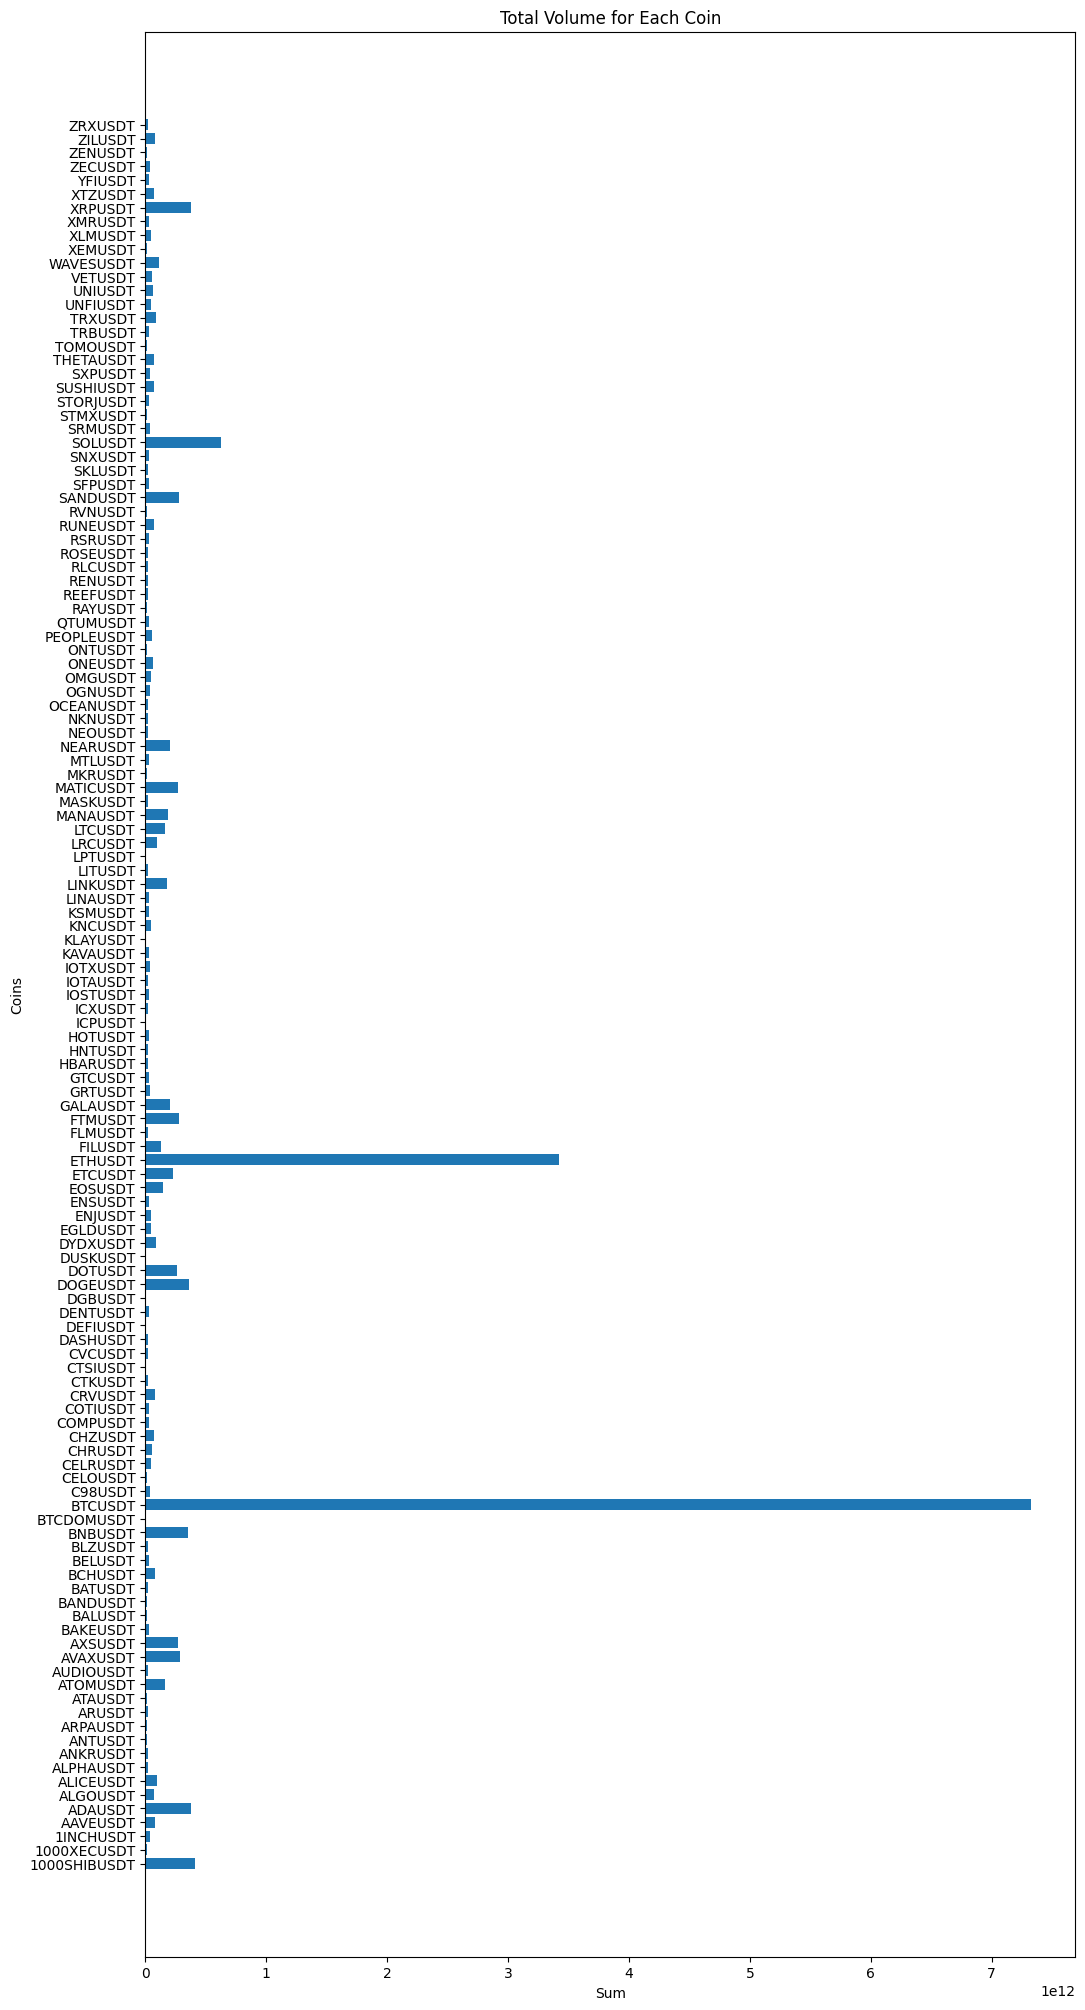

In [18]:
# Bar plot of Total Volume per coin

volume = volume_df.drop(volume_df.columns[0], axis=1)
column_sums = volume.sum()
plt.figure(figsize=(12, 25))
plt.barh(column_sums.index, column_sums)
plt.title('Total Volume for Each Coin')
plt.xlabel('Sum')
plt.ylabel('Coins')
plt.show()

# Selection of a coin: 'ETHUSDT'

In [5]:
# creation of a single data table with the columns high/low/open/close

eth_df = pd.concat([open_df['date'], open_df['ETHUSDT'], close_df['ETHUSDT'], high_df['ETHUSDT'], low_df['ETHUSDT']], axis=1)
eth_df.columns = ['date', 'open', 'close', 'high', 'low']
print(eth_df)

                      date     open    close     high      low
0      2021-06-01 00:00:00  2647.30  2714.39  2721.51  2638.44
1      2021-06-01 01:00:00  2714.38  2732.20  2741.45  2689.00
2      2021-06-01 02:00:00  2732.27  2672.02  2732.71  2662.00
3      2021-06-01 03:00:00  2672.64  2643.57  2676.25  2613.15
4      2021-06-01 04:00:00  2643.09  2631.54  2678.00  2612.77
...                    ...      ...      ...      ...      ...
10987  2022-09-01 19:00:00  1555.57  1559.46  1572.00  1552.00
10988  2022-09-01 20:00:00  1559.47  1563.07  1569.30  1555.71
10989  2022-09-01 21:00:00  1563.07  1579.69  1584.94  1561.02
10990  2022-09-01 22:00:00  1579.69  1581.83  1595.00  1576.09
10991  2022-09-01 23:00:00  1581.82  1584.84  1599.00  1580.58

[10992 rows x 5 columns]


In [6]:
#Calcul du rendement et l'ajouter comme une nouvelle colonne

eth_df['rendement'] = eth_df['close'] / eth_df['open']
print(eth_df)

                      date     open    close     high      low  rendement
0      2021-06-01 00:00:00  2647.30  2714.39  2721.51  2638.44   1.025343
1      2021-06-01 01:00:00  2714.38  2732.20  2741.45  2689.00   1.006565
2      2021-06-01 02:00:00  2732.27  2672.02  2732.71  2662.00   0.977949
3      2021-06-01 03:00:00  2672.64  2643.57  2676.25  2613.15   0.989123
4      2021-06-01 04:00:00  2643.09  2631.54  2678.00  2612.77   0.995630
...                    ...      ...      ...      ...      ...        ...
10987  2022-09-01 19:00:00  1555.57  1559.46  1572.00  1552.00   1.002501
10988  2022-09-01 20:00:00  1559.47  1563.07  1569.30  1555.71   1.002308
10989  2022-09-01 21:00:00  1563.07  1579.69  1584.94  1561.02   1.010633
10990  2022-09-01 22:00:00  1579.69  1581.83  1595.00  1576.09   1.001355
10991  2022-09-01 23:00:00  1581.82  1584.84  1599.00  1580.58   1.001909

[10992 rows x 6 columns]


**Étude de la normalité des rendements**

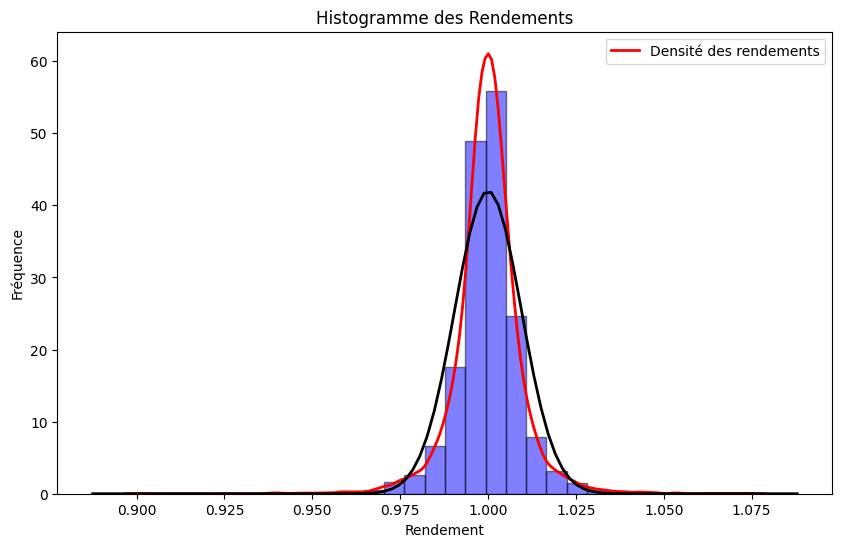

In [7]:
# L'histogramme et la densité des rendements de 'ETHUSDT'

plt.figure(figsize=(10, 6))
plt.hist(eth_df['rendement'], bins=30, alpha=0.5, color='blue', edgecolor='black', density=True)
plt.title('Histogramme des Rendements')
plt.xlabel('Rendement')
plt.ylabel('Fréquence')
sns.kdeplot(eth_df['rendement'], color='red', linestyle='-', linewidth=2)
plt.legend(['Densité des rendements'])


# Calculer la moyenne et l'écart type des rendements 
mu, sigma = eth_df['rendement'].mean(), eth_df['rendement'].std()

# Tracer la densité de la loi normale
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)


plt.show()


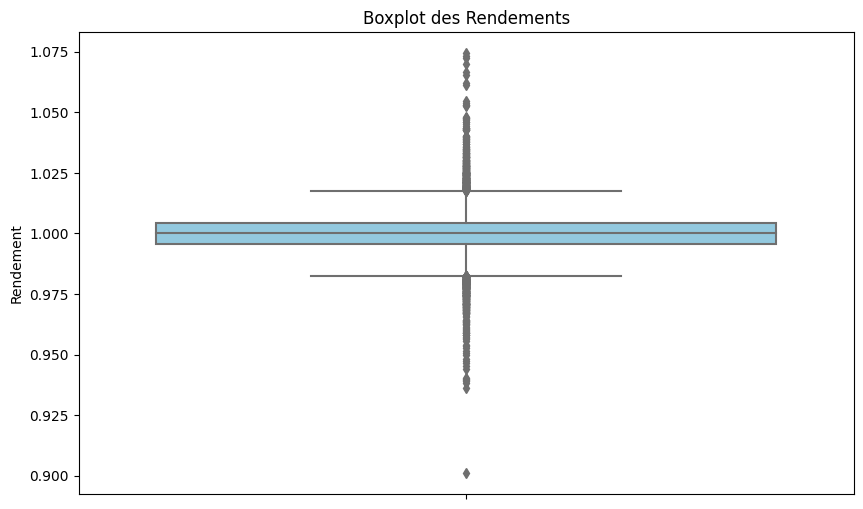

In [22]:
# Boxplot des rendements

plt.figure(figsize=(10, 6))
sns.boxplot(data=eth_df, y='rendement', color='skyblue')
plt.title('Boxplot des Rendements')
plt.ylabel('Rendement')
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



<Figure size 800x600 with 0 Axes>

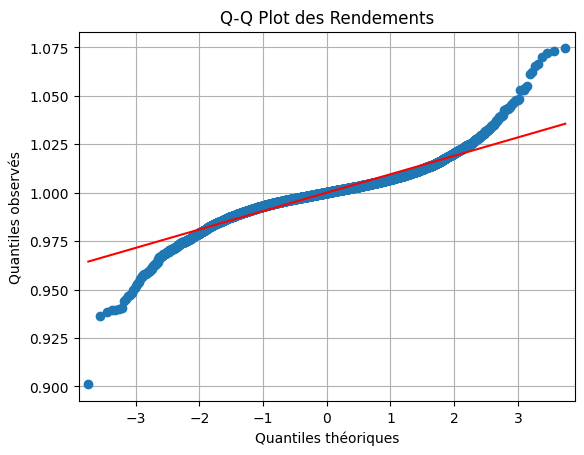

In [23]:
# Q-Q plot des rendements

plt.figure(figsize=(8, 6))
sm.qqplot(eth_df['rendement'], line='s', color=(0.0, 0.0, 1.0, 1))
plt.title('Q-Q Plot des Rendements')
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles observés')
plt.grid(True)
plt.show()

In [24]:
# Calculate the kurtosis and skewness of 'rendement'

kurtosis_value = eth_df['rendement'].kurtosis()
skewness_value = eth_df['rendement'].skew()
print("Kurtosis:", kurtosis_value)
print("Skewness:", skewness_value)

Kurtosis: 7.3196943995357024
Skewness: 0.014713637641450663


La kurtosis indique que la distribution a une concentration de valeurs plus importante autour de la moyenne par rapport à la distribution normale.
La skewness est proche de 0 indiquant une légère asymétrie vers la droite de la distribution, mais la distribution est principalement symétrique.

In [25]:
# Shapiro-Wilk test for normality

statistic, p_value = shapiro(eth_df['rendement'])
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Check if the null hypothesis of normality is rejected or not

if p_value > 0.05:
    print("The null hypothesis of normality is not rejected (fail to reject H0)")
else:
    print("The null hypothesis of normality is rejected (reject H0)")

Test Statistic: 0.9206557273864746
P-value: 0.0
The null hypothesis of normality is rejected (reject H0)


/opt/conda/lib/python3.10/site-packages/scipy/stats/_morestats.py:1882: UserWarning:

p-value may not be accurate for N > 5000.



In [26]:
# Kolmogorov-Smirnov test for normality

statistic, p_value = kstest(eth_df['rendement'], 'norm')
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Check if the null hypothesis is rejected

if p_value > 0.05:
    print("The null hypothesis of normality is not rejected (fail to reject H0)")
else:
    print("The null hypothesis of normality is rejected (reject H0)")

Test Statistic: 0.8289891612249771
P-value: 0.0
The null hypothesis of normality is rejected (reject H0)


# Normalization of the 'rendement' column

In [8]:
from sklearn.preprocessing import QuantileTransformer
# Créez une instance de QuantileTransformer
quantile_transformer = QuantileTransformer( n_quantiles=4000, output_distribution='normal', ignore_implicit_zeros=False, subsample=10000, random_state=None, copy=False)
returns_2d = eth_df['rendement'].values.reshape(-1, 1)
# Ajustez et transformez les rendements
transformed_returns = quantile_transformer.fit_transform(returns_2d)
print(eth_df)

                      date     open    close     high      low  rendement
0      2021-06-01 00:00:00  2647.30  2714.39  2721.51  2638.44   2.281206
1      2021-06-01 01:00:00  2714.38  2732.20  2741.45  2689.00   0.959949
2      2021-06-01 02:00:00  2732.27  2672.02  2732.71  2662.00  -2.069539
3      2021-06-01 03:00:00  2672.64  2643.57  2676.25  2613.15  -1.369684
4      2021-06-01 04:00:00  2643.09  2631.54  2678.00  2612.77  -0.687680
...                    ...      ...      ...      ...      ...        ...
10987  2022-09-01 19:00:00  1555.57  1559.46  1572.00  1552.00   0.393265
10988  2022-09-01 20:00:00  1559.47  1563.07  1569.30  1555.71   0.363690
10989  2022-09-01 21:00:00  1563.07  1579.69  1584.94  1561.02   1.377878
10990  2022-09-01 22:00:00  1579.69  1581.83  1595.00  1576.09   0.204906
10991  2022-09-01 23:00:00  1581.82  1584.84  1599.00  1580.58   0.299986

[10992 rows x 6 columns]


In [9]:
eth_df['date'] = pd.to_datetime(eth_df['date'])

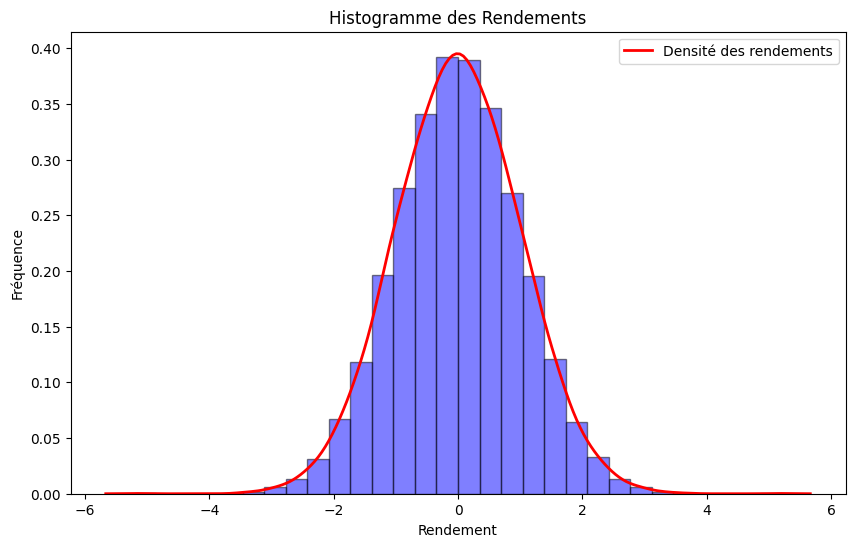

In [10]:
# L'histogramme et la densité des rendements de 'ETHUSDT'

plt.figure(figsize=(10, 6))
plt.hist(eth_df['rendement'], bins=30, alpha=0.5, color='blue', edgecolor='black', density=True)
plt.title('Histogramme des Rendements')
plt.xlabel('Rendement')
plt.ylabel('Fréquence')
sns.kdeplot(eth_df['rendement'], color='red', linestyle='-', linewidth=2)
plt.legend(['Densité des rendements'])
plt.show()

/opt/conda/lib/python3.10/site-packages/statsmodels/graphics/gofplots.py:1045: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


<Figure size 800x600 with 0 Axes>

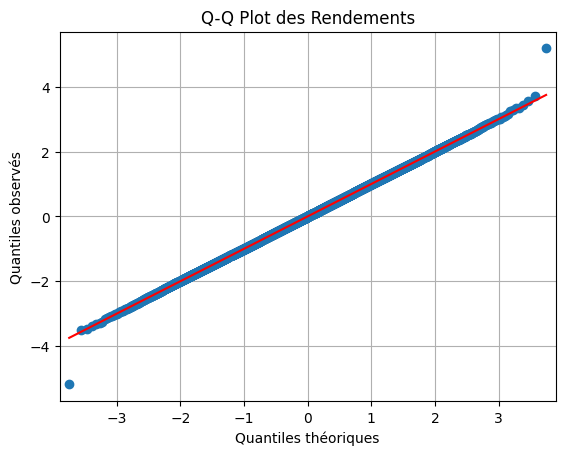

In [11]:
# Q-Q plot des rendements

plt.figure(figsize=(8, 6))
sm.qqplot(eth_df['rendement'], line='s', color=(0.0, 0.0, 1.0, 1))
plt.title('Q-Q Plot des Rendements')
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles observés')
plt.grid(True)
plt.show()

In [12]:
# Kolmogorov-Smirnov test for normality

statistic, p_value = kstest(eth_df['rendement'], 'norm')
print("Test Statistic:", statistic)
print("P-value:", p_value)

# Check if the null hypothesis is rejected

if p_value > 0.05:
    print("The null hypothesis of normality is not rejected (fail to reject H0)")
else:
    print("The null hypothesis of normality is rejected (reject H0)")

Test Statistic: 0.0025469517143619225
P-value: 0.9999996506114686
The null hypothesis of normality is not rejected (fail to reject H0)


In [13]:
reddit_df=pd.read_csv("/kaggle/input/crypto/reddit_cc.csv")

In [14]:
reddit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40918 entries, 0 to 40917
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      40918 non-null  object 
 1   score      40918 non-null  int64  
 2   id         40918 non-null  object 
 3   url        18774 non-null  object 
 4   comms_num  40918 non-null  int64  
 5   created    40918 non-null  float64
 6   body       33733 non-null  object 
 7   timestamp  40918 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.5+ MB


In [15]:
reddit_df.describe()

,score,comms_num,created
count,40918.000000,40918.000000,4.091800e+04
mean,16.115377,31.327778,1.630084e+09
std,200.299711,427.511306,8.572618e+05
min,-5.000000,0.000000,1.628887e+09
25%,1.000000,0.000000,1.629268e+09
50%,2.000000,0.000000,1.630103e+09
75%,6.000000,25.000000,1.630748e+09
max,16226.000000,35579.000000,1.632042e+09


In [16]:
reddit_df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,RSUN is in a parabolic rise. The FOMO is real....,0,p4blrv,https://www.reddit.com/r/CryptoCurrency/commen...,18,1.628960e+09,"NFT’s, more specifically NFT card games are ta...",2021-08-14 19:51:50
1,If you see a good post don’t forget to tip the...,2,p4bld3,https://www.reddit.com/r/CryptoCurrency/commen...,37,1.628960e+09,"For people who don’t already know, if you like...",2021-08-14 19:51:10
2,I hope moons fail.,0,p4bl77,https://www.reddit.com/r/CryptoCurrency/commen...,61,1.628960e+09,Everyone in this sub is obsessed with moons. E...,2021-08-14 19:50:55
3,If you could get 1 BTC or 20 ETH or 50000 ADA ...,12,p4bfmn,https://www.reddit.com/r/CryptoCurrency/commen...,126,1.628959e+09,Imagine you get the chance to choose one of th...,2021-08-14 19:42:23
4,My husband (investment banker) doesn’t trust m...,0,p4bb2i,https://www.reddit.com/r/CryptoCurrency/commen...,27,1.628959e+09,\nI love my daughter and want the best for her...,2021-08-14 19:35:17


In [17]:
reddit_df.tail()

,title,score,id,url,comms_num,created,body,timestamp
40913,Comment,2,hdfvj70,NaN,0,1.632040e+09,*take a bong rip of hopium* thats the shit,2021-09-19 11:30:46
40914,Comment,1,hdfvj30,NaN,0,1.632040e+09,Best Harmony One worst chilliz,2021-09-19 11:30:44
40915,Comment,1,hdfvj27,NaN,0,1.632040e+09,"Yes, there is an option to see all your portfo...",2021-09-19 11:30:44
40916,Comment,1,hdfvj13,NaN,0,1.632040e+09,Im just giving you a reason of why founders ma...,2021-09-19 11:30:43
40917,Comment,1,hdfvj12,NaN,0,1.632040e+09,F,2021-09-19 11:30:43


In [18]:
reddit_df= reddit_df[['score','timestamp']]

In [19]:
reddit_df

,score,timestamp
0,0,2021-08-14 19:51:50
1,2,2021-08-14 19:51:10
2,0,2021-08-14 19:50:55
3,12,2021-08-14 19:42:23
4,0,2021-08-14 19:35:17
...,...,...
40913,2,2021-09-19 11:30:46
40914,1,2021-09-19 11:30:44
40915,1,2021-09-19 11:30:44
40916,1,2021-09-19 11:30:43


In [20]:
reddit_df['timestamp'] = pd.to_datetime(reddit_df['timestamp'])

# Sort the DataFrame by timestamp
reddit_df.sort_values(by='timestamp', inplace=True)

# Calculate rolling averages for different periods
reddit_df['Score_1h'] = reddit_df['score'].rolling(window=1).mean()
reddit_df['Score_3h'] = reddit_df['score'].rolling(window=3).mean()
reddit_df['Score_8h'] = reddit_df['score'].rolling(window=8).mean()
reddit_df['Score_12h'] = reddit_df['score'].rolling(window=12).mean()
reddit_df['Score_24h'] = reddit_df['score'].rolling(window=24).mean()

In [21]:
reddit_df=reddit_df.dropna()

In [22]:
reddit_df

,score,timestamp,Score_1h,Score_3h,Score_8h,Score_12h,Score_24h
1020,2,2021-08-13 23:56:09,2.0,2.333333,20.750,20.083333,31.583333
1019,79,2021-08-13 23:56:20,79.0,27.333333,27.750,25.750000,34.750000
1018,7,2021-08-13 23:56:37,7.0,29.333333,28.125,24.166667,34.916667
1017,12,2021-08-13 23:57:42,12.0,32.666667,14.250,23.166667,34.791667
1016,4,2021-08-13 23:57:49,4.0,7.666667,14.000,22.333333,34.625000
...,...,...,...,...,...,...,...
39976,1,2021-09-19 12:04:54,1.0,1.000000,1.000,1.000000,1.000000
39975,1,2021-09-19 12:04:55,1.0,1.000000,1.000,1.000000,1.000000
39974,1,2021-09-19 12:04:56,1.0,1.000000,1.000,1.000000,1.000000
39973,1,2021-09-19 12:05:00,1.0,1.000000,1.000,1.000000,1.000000


In [23]:
# Round the timestamp to the next hour
reddit_df['timestamp'] = pd.to_datetime(reddit_df['timestamp'])

reddit_df = reddit_df.groupby([reddit_df['timestamp'].dt.date, reddit_df['timestamp'].dt.hour]).mean()

reddit_df['timestamp']=(reddit_df['timestamp'] + pd.Timedelta('1 hour')).dt.floor('H')

reddit_df = reddit_df.reset_index(drop=True)


/tmp/ipykernel_42/2197189700.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reddit_df['timestamp'] = pd.to_datetime(reddit_df['timestamp'])


In [24]:
reddit_df

,score,timestamp,Score_1h,Score_3h,Score_8h,Score_12h,Score_24h
0,14.000000,2021-08-14 00:00:00,14.000000,13.592593,18.222222,19.953704,33.870370
1,15.844828,2021-08-14 01:00:00,15.844828,15.844828,15.849138,15.241379,14.804598
2,10.893617,2021-08-14 02:00:00,10.893617,10.893617,10.957447,12.108156,14.992908
3,8.250000,2021-08-14 03:00:00,8.250000,8.136364,8.011364,8.168561,8.482008
4,24.803279,2021-08-14 04:00:00,24.803279,24.797814,24.752049,24.766393,24.605874
...,...,...,...,...,...,...,...
548,27.312500,2021-09-19 09:00:00,27.312500,28.187500,29.804688,30.083333,36.880208
549,16.944444,2021-09-19 10:00:00,16.944444,16.574074,14.645833,14.888889,21.071759
550,8.454545,2021-09-19 11:00:00,8.454545,9.424242,11.943182,11.568182,12.196970
551,1.303067,2021-09-19 12:00:00,1.303067,1.304294,1.330521,1.352556,1.426943


In [25]:
# Rename the column 'timestamp' as 'date'
reddit_df = reddit_df.rename(columns={'timestamp': 'date'})

In [26]:
reddit_df

,score,date,Score_1h,Score_3h,Score_8h,Score_12h,Score_24h
0,14.000000,2021-08-14 00:00:00,14.000000,13.592593,18.222222,19.953704,33.870370
1,15.844828,2021-08-14 01:00:00,15.844828,15.844828,15.849138,15.241379,14.804598
2,10.893617,2021-08-14 02:00:00,10.893617,10.893617,10.957447,12.108156,14.992908
3,8.250000,2021-08-14 03:00:00,8.250000,8.136364,8.011364,8.168561,8.482008
4,24.803279,2021-08-14 04:00:00,24.803279,24.797814,24.752049,24.766393,24.605874
...,...,...,...,...,...,...,...
548,27.312500,2021-09-19 09:00:00,27.312500,28.187500,29.804688,30.083333,36.880208
549,16.944444,2021-09-19 10:00:00,16.944444,16.574074,14.645833,14.888889,21.071759
550,8.454545,2021-09-19 11:00:00,8.454545,9.424242,11.943182,11.568182,12.196970
551,1.303067,2021-09-19 12:00:00,1.303067,1.304294,1.330521,1.352556,1.426943


In [27]:
# Fusion des DataFrames eth_df et reddit_df sur la colonne 'date'
df= pd.merge(eth_df, reddit_df, on='date', how='inner')
df

,date,open,close,high,low,rendement,score,Score_1h,Score_3h,Score_8h,Score_12h,Score_24h
0,2021-08-14 00:00:00,3284.32,3324.38,3332.88,3284.32,1.510056,14.000000,14.000000,13.592593,18.222222,19.953704,33.870370
1,2021-08-14 01:00:00,3324.38,3309.98,3328.68,3287.08,-0.683804,15.844828,15.844828,15.844828,15.849138,15.241379,14.804598
2,2021-08-14 02:00:00,3309.98,3307.00,3325.65,3301.13,-0.148519,10.893617,10.893617,10.893617,10.957447,12.108156,14.992908
3,2021-08-14 03:00:00,3306.99,3307.00,3312.22,3285.23,-0.000965,8.250000,8.250000,8.136364,8.011364,8.168561,8.482008
4,2021-08-14 04:00:00,3307.01,3298.89,3313.00,3290.83,-0.389485,24.803279,24.803279,24.797814,24.752049,24.766393,24.605874
...,...,...,...,...,...,...,...,...,...,...,...,...
548,2021-09-19 09:00:00,3436.66,3442.99,3453.00,3436.66,0.287806,27.312500,27.312500,28.187500,29.804688,30.083333,36.880208
549,2021-09-19 10:00:00,3442.99,3427.79,3449.88,3417.95,-0.694060,16.944444,16.944444,16.574074,14.645833,14.888889,21.071759
550,2021-09-19 11:00:00,3427.79,3410.57,3430.00,3407.49,-0.777151,8.454545,8.454545,9.424242,11.943182,11.568182,12.196970
551,2021-09-19 12:00:00,3410.57,3327.07,3410.57,3301.00,-2.181771,1.303067,1.303067,1.304294,1.330521,1.352556,1.426943


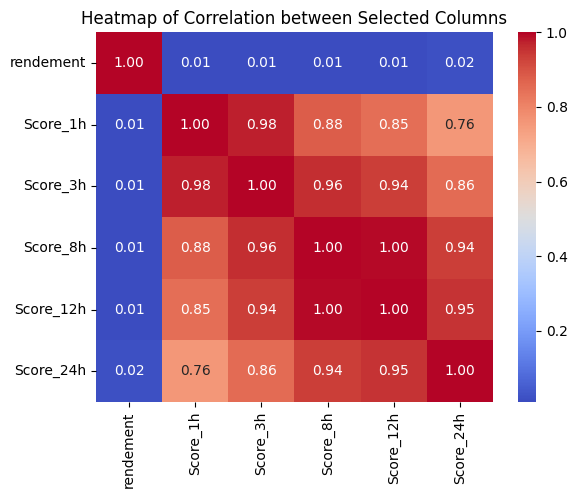

In [28]:
# Heatmap of Correlation between score and rendements
selected_columns = ['rendement', 'Score_1h', 'Score_3h', 'Score_8h','Score_12h', 'Score_24h']
selected_df = df[selected_columns]
sns.heatmap(selected_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Correlation between Selected Columns')
plt.show()

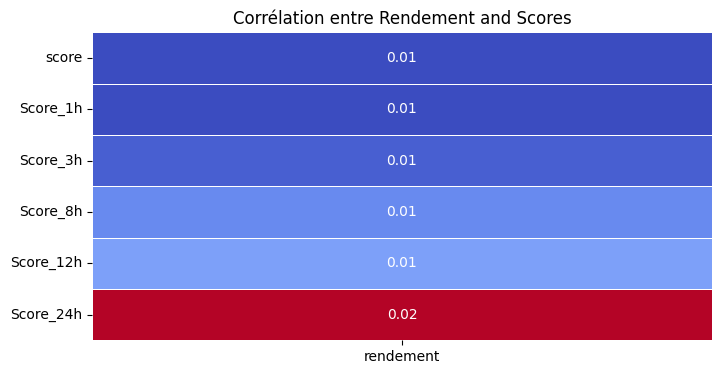

In [29]:
correlation_matrix = df.corr()
selected_columns=['score', 'Score_1h','Score_3h', 'Score_8h', 'Score_12h','Score_24h']
rendement_score_corr = correlation_matrix.loc['rendement', selected_columns]

# Create a heatmap for the filtered correlation
plt.figure(figsize=(8, 4))
sns.heatmap(rendement_score_corr.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar=False)
plt.title('Corrélation entre Rendement and Scores')
plt.show()

**On remarque une faible corrélation entre le rendement et les scores.**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Separate independent variable (X) and dependent variable (Y)
x=df['score'].values.reshape(-1, 1)  # Independent variable(s)
y=df['rendement'] # Dependent variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit the model to the training data
model=LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(x_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE by setting squared=False
r2 = r2_score(y_test, y_pred)

# print evaluation metrics
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('R-squared (R²) Score:', r2)

Mean Absolute Error (MAE): 0.7328066454407967
Mean Squared Error (MSE): 0.8072562357117353
Root Mean Squared Error (RMSE): 0.8984743934646859
R-squared (R²) Score: -0.022715118177987437


Une MAE de 0.733 signifie en moyenne, le modèle s'est trompé d'environ 0.733 unités dans sa prédiction.
La MSE donne une idée de la dispersion des erreurs. Une MSE de 0.807 indique une erreur moyenne de prédiction plus grande que celle de la MAE.
La RMSE est interprétée dans les mêmes unités que la variable cible et fournit une mesure de l'écart moyen entre les valeurs prédites et les valeurs réelles.
R² mesure la proportion de la variance dans la variable cible qui est expliquée par le modèle. Un R² de -0.022 suggère que le modèle n'est pas capable de bien expliquer la variance de la variable cible et qu'il performe même pire qu'un modèle trivial (qui prédit simplement la moyenne de la variable cible)

# Conclusion
**En résumé, ces métriques indiquent que le modèle ne performe pas bien dans la prédiction du rendement. Une MAE, MSE et RMSE relativement élevées et un R² négatif suggèrent que le modèle n'est pas capable de capturer les relations entre les scores et le rendements**

In [31]:
close_df

,date,1000SHIBUSDT,1000XECUSDT,1INCHUSDT,AAVEUSDT,ADAUSDT,ALGOUSDT,ALICEUSDT,ALPHAUSDT,ANKRUSDT,...,XEMUSDT,XLMUSDT,XMRUSDT,XRPUSDT,XTZUSDT,YFIUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
0,2021-06-01 00:00:00,0.009276,0.00000,3.2140,382.91,1.7401,0.9363,7.433,0.8681,0.10638,...,0.1951,0.40272,272.85,1.0459,3.606,46996.8,162.13,107.762,0.11554,1.0205
1,2021-06-01 01:00:00,0.009193,0.00000,3.2561,385.78,1.7719,0.9404,7.594,0.8826,0.10843,...,0.1964,0.41360,273.28,1.0906,3.605,47354.1,163.18,111.378,0.11729,1.0261
2,2021-06-01 02:00:00,0.009096,0.00000,3.1696,377.20,1.7275,0.9185,7.310,0.8550,0.10669,...,0.1922,0.40116,267.75,1.0601,3.542,46123.0,158.51,108.767,0.11470,0.9965
3,2021-06-01 03:00:00,0.009042,0.00000,3.1455,382.30,1.7112,0.9165,7.218,0.8514,0.10769,...,0.1917,0.40232,270.87,1.0447,3.540,45884.3,157.11,107.615,0.11397,1.0019
4,2021-06-01 04:00:00,0.009078,0.00000,3.1338,380.50,1.7154,0.9112,7.157,0.8479,0.10666,...,0.1891,0.39691,268.72,1.0375,3.502,45584.0,156.80,106.844,0.11271,1.0079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10987,2022-09-01 19:00:00,0.012051,0.04531,0.6533,84.47,0.4524,0.2880,1.993,0.1199,0.03409,...,0.0429,0.10323,151.49,0.3270,1.500,8999.0,57.89,15.520,0.03559,0.2917
10988,2022-09-01 20:00:00,0.012082,0.04571,0.6565,85.29,0.4527,0.2895,2.008,0.1204,0.03438,...,0.0430,0.10384,151.68,0.3295,1.507,9031.0,58.19,15.608,0.03566,0.2927
10989,2022-09-01 21:00:00,0.012233,0.04597,0.6632,86.01,0.4560,0.2918,2.029,0.1217,0.03476,...,0.0435,0.10429,152.86,0.3319,1.521,9175.0,59.13,15.704,0.03596,0.2954
10990,2022-09-01 22:00:00,0.012270,0.04605,0.6652,86.51,0.4567,0.2917,2.035,0.1219,0.03483,...,0.0437,0.10452,153.95,0.3317,1.529,9270.0,59.27,15.712,0.03616,0.2954


# **Time Series Analysis**

In [32]:
import statsmodels.api as sm

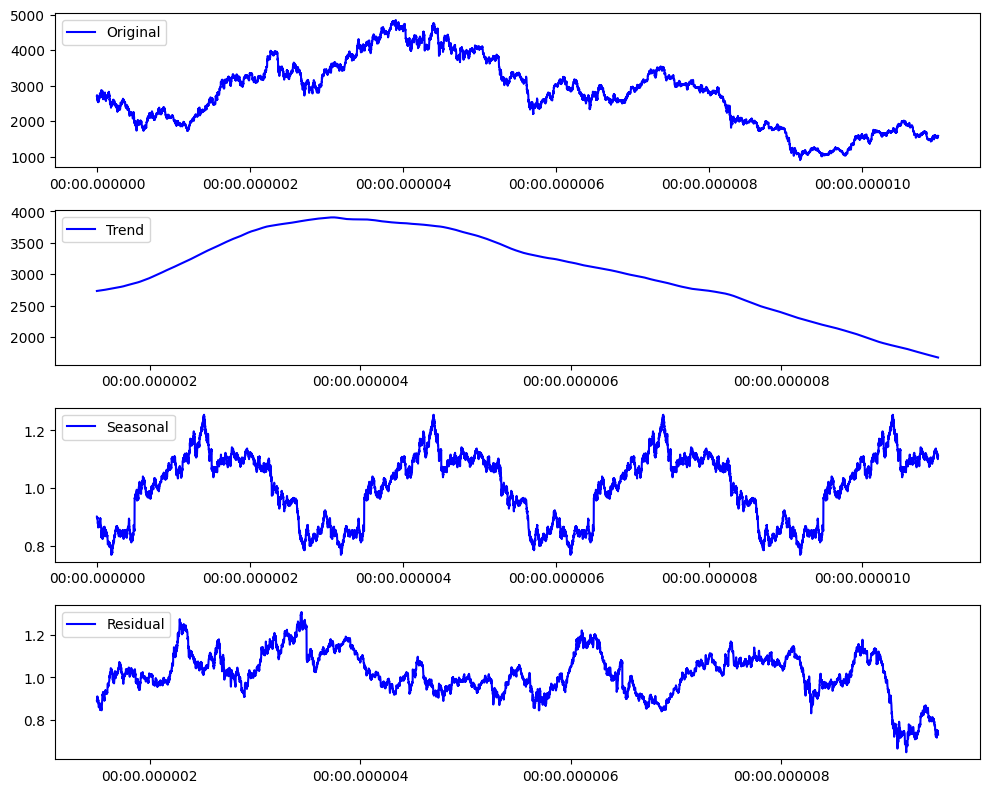

In [33]:
close_df.set_index(pd.to_datetime(close_df.index), inplace=True)
result = sm.tsa.seasonal_decompose(close_df['ETHUSDT'], model='multiplicave', period=3000)
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(close_df['ETHUSDT'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='blue')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='blue')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [79]:
close_df

,date,1000SHIBUSDT,1000XECUSDT,1INCHUSDT,AAVEUSDT,ADAUSDT,ALGOUSDT,ALICEUSDT,ALPHAUSDT,ANKRUSDT,...,XEMUSDT,XLMUSDT,XMRUSDT,XRPUSDT,XTZUSDT,YFIUSDT,ZECUSDT,ZENUSDT,ZILUSDT,ZRXUSDT
1970-01-01 00:00:00.000000000,2021-06-01 00:00:00,0.009276,0.00000,3.2140,382.91,1.7401,0.9363,7.433,0.8681,0.10638,...,0.1951,0.40272,272.85,1.0459,3.606,46996.8,162.13,107.762,0.11554,1.0205
1970-01-01 00:00:00.000000001,2021-06-01 01:00:00,0.009193,0.00000,3.2561,385.78,1.7719,0.9404,7.594,0.8826,0.10843,...,0.1964,0.41360,273.28,1.0906,3.605,47354.1,163.18,111.378,0.11729,1.0261
1970-01-01 00:00:00.000000002,2021-06-01 02:00:00,0.009096,0.00000,3.1696,377.20,1.7275,0.9185,7.310,0.8550,0.10669,...,0.1922,0.40116,267.75,1.0601,3.542,46123.0,158.51,108.767,0.11470,0.9965
1970-01-01 00:00:00.000000003,2021-06-01 03:00:00,0.009042,0.00000,3.1455,382.30,1.7112,0.9165,7.218,0.8514,0.10769,...,0.1917,0.40232,270.87,1.0447,3.540,45884.3,157.11,107.615,0.11397,1.0019
1970-01-01 00:00:00.000000004,2021-06-01 04:00:00,0.009078,0.00000,3.1338,380.50,1.7154,0.9112,7.157,0.8479,0.10666,...,0.1891,0.39691,268.72,1.0375,3.502,45584.0,156.80,106.844,0.11271,1.0079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.000010987,2022-09-01 19:00:00,0.012051,0.04531,0.6533,84.47,0.4524,0.2880,1.993,0.1199,0.03409,...,0.0429,0.10323,151.49,0.3270,1.500,8999.0,57.89,15.520,0.03559,0.2917
1970-01-01 00:00:00.000010988,2022-09-01 20:00:00,0.012082,0.04571,0.6565,85.29,0.4527,0.2895,2.008,0.1204,0.03438,...,0.0430,0.10384,151.68,0.3295,1.507,9031.0,58.19,15.608,0.03566,0.2927
1970-01-01 00:00:00.000010989,2022-09-01 21:00:00,0.012233,0.04597,0.6632,86.01,0.4560,0.2918,2.029,0.1217,0.03476,...,0.0435,0.10429,152.86,0.3319,1.521,9175.0,59.13,15.704,0.03596,0.2954
1970-01-01 00:00:00.000010990,2022-09-01 22:00:00,0.012270,0.04605,0.6652,86.51,0.4567,0.2917,2.035,0.1219,0.03483,...,0.0437,0.10452,153.95,0.3317,1.529,9270.0,59.27,15.712,0.03616,0.2954


# **Modeling and Forecasting**

In [35]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [80]:
# Specify the number of test data points
n_test = 10

In [81]:
# Set the date column as the index
close_df.set_index('date', inplace=True)

In [82]:
# Split data into training and testing sets
train = close_df.iloc[:-n_test]
test = close_df.iloc[-n_test:]

In [86]:
# Split the training and testing data for the other column
train_other = train['ETHUSDT']
test_other = test['ETHUSDT']

In [87]:
# Fit ARIMA model for the other column
model_other = ARIMA(train_other, order=(5,1,0))  # Example order (p, d, q) for the other column
model_fit_other = model_other.fit()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [90]:
# Forecast
forecast_values_other = model_fit_other.forecast(steps=len(test_other))

In [91]:
# Evaluate the model for the other column
mse = mean_squared_error(test_other, forecast_values_other)
rmse = np.sqrt(mse)
print(f'Other Column: Root Mean Squared Error (RMSE): {rmse}')

Other Column: Root Mean Squared Error (RMSE): 22.366187465745448
